# Visualize a filter

In [1]:
from scipy import ndimage, misc
import matplotlib.pyplot as plt

In [2]:
misc.ascent().shape

(512, 512)

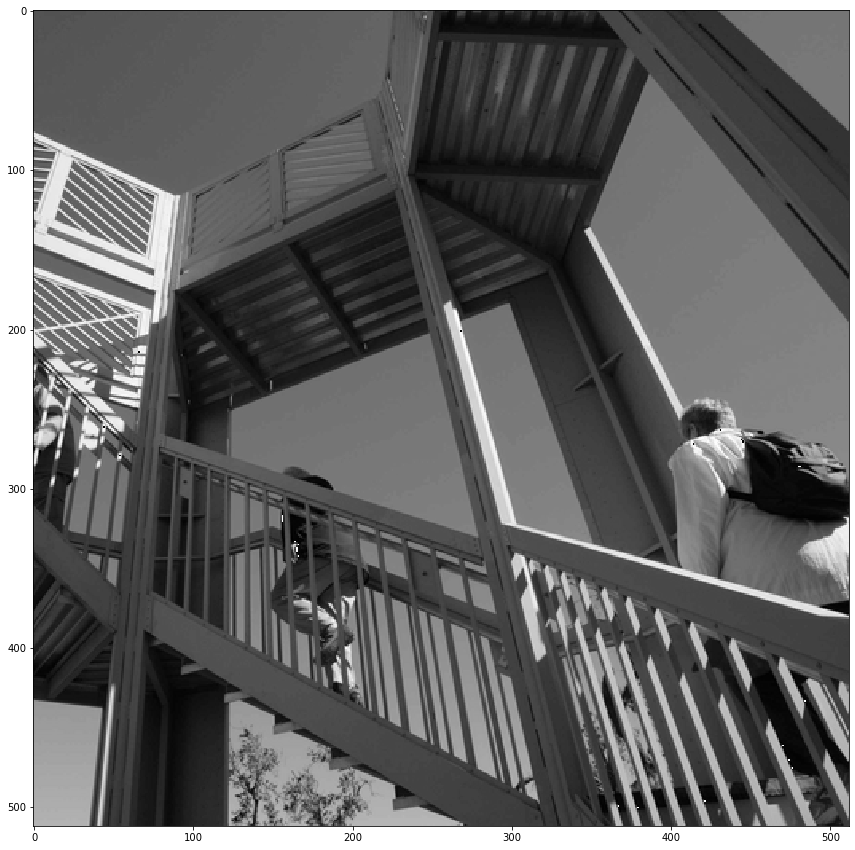

In [3]:
fig = plt.figure(figsize=(15, 15))
plt.gray()
plt.imshow(misc.ascent())

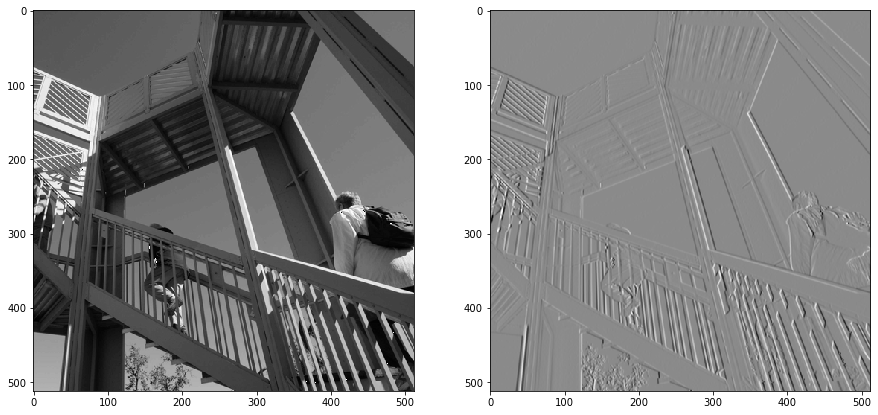

In [4]:
fig = plt.figure(figsize=(15, 15))
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ascent = misc.ascent()
result = ndimage.sobel(ascent)
ax1.imshow(ascent)
ax2.imshow(result)
plt.show()

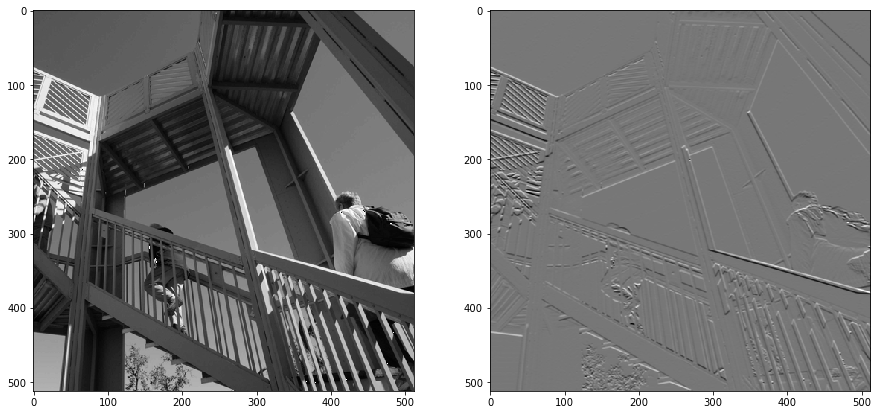

In [5]:
fig = plt.figure(figsize=(15, 15))
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ascent = misc.ascent()
result = ndimage.sobel(ascent, axis=0)
ax1.imshow(ascent)
ax2.imshow(result)
plt.show()

# Build a Model

In [6]:
# load the necessary modules

# data
from tensorflow.keras.datasets import mnist, fashion_mnist

# model
from tensorflow.keras.models import Sequential

# layers
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Activation

# categorical
from tensorflow.keras.utils import to_categorical

/Users/stefanroth/anaconda3/envs/deep/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/stefanroth/anaconda3/envs/deep/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/stefanroth/anaconda3/envs/deep/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/stefanroth/anaconda3/envs/deep

In [7]:
# Maybe you want to play around with fashion
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

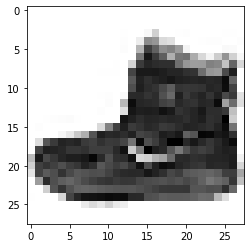

In [8]:
plt.imshow(x_train[0], cmap=plt.cm.Greys)

In [9]:
# load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

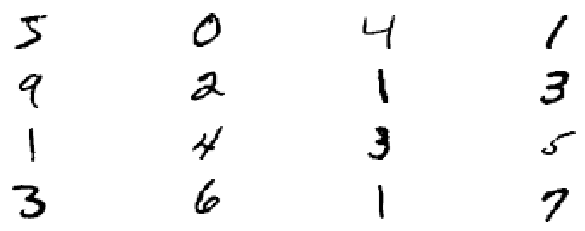

In [10]:
# inspect the data
plt.figure(figsize=(12,4))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
# reshape the data
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

In [13]:
# normalize the data
x_train = (x_train-x_train.mean())/x_train.std()
x_test = (x_test-x_test.mean())/x_test.std()

In [14]:
# convert output to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
y_train[0] # is a 5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
# define the model
model = Sequential([
    # First convolutional layer
    Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape=(28, 28, 1)),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    Activation('relu'),

    
    # Second convolutional layer

    
    # Final Layer
    Flatten(),
    Dense(units=10, activation='softmax')

])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [17]:
# Should be equivalent to
# m = Sequential()
# m.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape=(28, 28, 1)))
# m.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2))),
# ...

In [18]:
# look at the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
activation (Activation)      (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                31370     
Total params: 31,530
Trainable params: 31,530
Non-trainable params: 0
_________________________________________________________________


In [19]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy']
)

In [20]:
# fit the model
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=2, 
                   validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 4s 83us/sample - loss: 0.2094 - acc: 0.9374 - val_loss: 0.0951 - val_acc: 0.9711
Epoch 2/2
48000/48000 [==============================] - 4s 91us/sample - loss: 0.0788 - acc: 0.9760 - val_loss: 0.0753 - val_acc: 0.9778


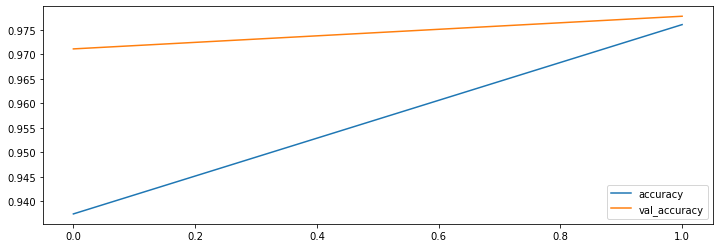

In [21]:
# plot the accuracy
plt.figure(figsize=(12,4))
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label='val_accuracy')
plt.legend()
plt.show()

In [22]:
# 
model.predict(x_train[0].reshape(1, 28, 28, 1)).round(2)

array([[0.  , 0.  , 0.  , 0.26, 0.  , 0.74, 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

### Let's have a look at the feature maps

In [23]:
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array
from numpy import expand_dims

# redefine model to output right after the first hidden layer
model_small = Model(inputs=model.inputs, outputs=model.layers[2].output)
model_small.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
activation (Activation)      (None, 14, 14, 16)        0         
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


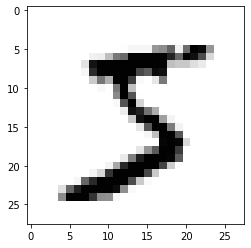

In [24]:
# load the image with the required shape
img = x_train[0]
plt.imshow(img.reshape(28,28), cmap=plt.cm.Greys)

In [25]:
img.shape

(28, 28, 1)

In [26]:
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
img.shape

(1, 28, 28, 1)

In [27]:
# get feature map for first hidden layer
feature_maps = model_small.predict(img)
#feature_maps[0]

In [28]:
feature_maps.shape

(1, 14, 14, 16)

In [29]:
#feature_maps[0]

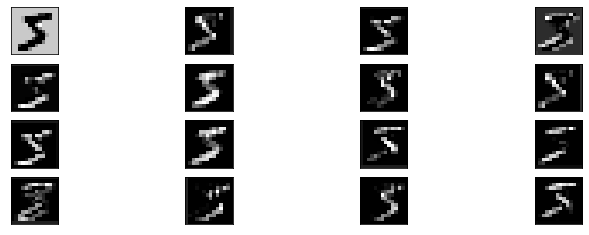

In [30]:
# plot all 32 maps in an 4*8 squares
height = 4
width = 4
ix = 1
plt.figure(figsize=(12,4))
for _ in range(height):
    for _ in range(width):
        # specify subplot and turn of axis
        ax = plt.subplot(height, width, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
plt.show()

## Further readings

#### Stanford Ressource

https://cs231n.github.io/convolutional-networks/

#### Dive into the math behind convolutional neural networks

https://towardsdatascience.com/gentle-dive-into-math-behind-convolutional-neural-networks-79a07dd44cf9

## Visualization

#### Visualization toolbox

- https://www.youtube.com/watch?v=AgkfIQ4IGaM

- https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html

#### How to visualize filters in cnns

https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

#### How to visualize filters in deep layers

https://www.researchgate.net/profile/Aaron_Courville/publication/265022827_Visualizing_Higher-Layer_Features_of_a_Deep_Network/links/53ff82b00cf24c81027da530.pdf

# Wrapping up

## What did we talk about?
Convolutional Neural Networks

## Why?
Because they perform better in any image processing task then usual feed forward networks

## Why are they better?
- They have less trainable parameters and are less prone to overfitting
- They take into account the spatial relationship of pixels in images
- They are able to detect objects in different locations of the image

## What is the standard architecture?
- Input
- Filters
- Max Pooling
- Activation

...

- Flatten
- Dense
- Activation